In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer.radar_chart import Radar
import sqlite3

In [2]:
conn = sqlite3.connect("Databases/2021/All_Player_Data.db")
query = ("""SELECT player_name,
            90*CAST(npxG AS REAL)/CAST(time AS REAL) AS npxG_p90,
            90*CAST(npg AS REAL)/CAST(time AS REAL) AS npg_p90,
            90*CAST(xA AS REAL)/CAST(time AS REAL) AS xA_p90,
            90*CAST(key_passes AS REAL)/CAST(time AS REAL) AS key_passes_p90,
            90*CAST(xGBuildup AS REAL)/CAST(time AS REAL) AS xGBuildup_p90
            FROM 
                All_Player_Data
            WHERE
                player_name = 'Karim Benzema'
                OR player_name = 'Kylian Mbappe-Lottin'
    """)
df = pd.read_sql(query, conn)
conn.close()

mbappe = df.loc[df.index == 0, ['npxG_p90','npg_p90','xA_p90','key_passes_p90','xGBuildup_p90']].values.flatten().tolist()
benzema = df.loc[df.index == 1, ['npxG_p90','npg_p90','xA_p90','key_passes_p90','xGBuildup_p90']].values.flatten().tolist()

df

,player_name,npxG_p90,npg_p90,xA_p90,key_passes_p90,xGBuildup_p90
0,Kylian Mbappe-Lottin,0.602068,0.714801,0.340934,1.949458,0.371927
1,Karim Benzema,0.543877,0.698529,0.276862,2.095588,0.333901


In [114]:
def radar_mosaic(radar_height, title_height, figheight):
    figwidth = figheight
    figure, axes = plt.subplot_mosaic([['title'], ['radar']], gridspec_kw={'height_ratios': [title_height, radar_height], 'bottom': 0, 'left': 0, 'top': 1, 'right': 1, 'hspace': 0, 'wspace': 0}, figsize=(figwidth, figheight))
    axes['title'].axis('off')
    return figure, axes

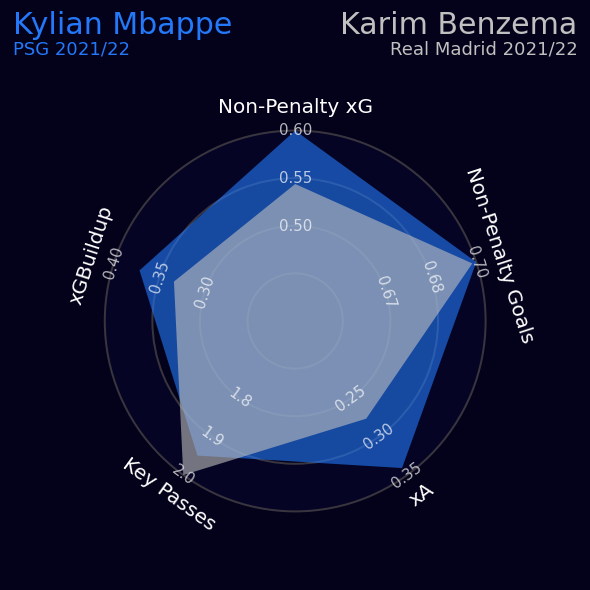

In [115]:
params = ["Non-Penalty xG", "Non-Penalty Goals", "xA", "Key Passes", "xGBuildup"]
lower = [0.45, 0.65, 0.20, 1.7, 0.25]
upper = [.6, .7, .35, 2.0, 0.4]

radar = Radar(params, lower, upper,  num_rings=3, ring_width=2, center_circle_radius=2)

fig, ax = radar_mosaic(0.7, 0.07, 8) 
radar.setup_axis(ax=ax['radar'], facecolor='None')

rings_inner = radar.draw_circles(ax=ax['radar'], facecolor='#050424', edgecolor='#39353f',lw=2)
radar_output = radar.draw_radar_compare(mbappe, benzema, ax=ax['radar'], kwargs_radar={'facecolor': '#2379fa', 'alpha': 0.6}, kwargs_compare={'facecolor': 'silver', 'alpha': 0.6})

range_labels = radar.draw_range_labels(ax=ax['radar'], fontsize=15, alpha=0.7, color='w')
param_labels = radar.draw_param_labels(ax=ax['radar'], offset=1, wrap=17, fontsize=20, color='w')

title1_text = ax['title'].text(0.01, 0.65, 'Kylian Mbappe', fontsize=30, color='#2379fa', ha='left', va='center')
title2_text = ax['title'].text(0.99, 0.65, 'Karim Benzema', fontsize=30, color='silver', ha='right', va='center')
title12_text = ax['title'].text(0.01, 0.20, 'PSG 2021/22', fontsize=18, color='#2379fa', ha='left', va='center')
title22_text = ax['title'].text(0.99, 0.20, 'Real Madrid 2021/22', fontsize=18, color='silver', ha='right', va='center')
fig.set_facecolor('#03021a')